In [1]:
import numpy as np
import seaborn as sns
import scipy
import tqdm

In [2]:
mean = 5
sd = 2

In [3]:
distribution = np.random.normal(mean, sd, 100000)

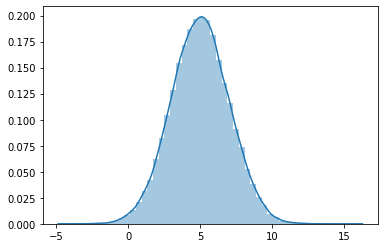

In [4]:
sns.distplot(distribution)

In [5]:
def creatingDataSamples(pop_data, sample_proportion=0):
    DEFAULT_SAMPLE_PROPORTION = 0.05
    if sample_proportion == 0:
        sample_size = int(len(pop_data) * DEFAULT_SAMPLE_PROPORTION)
    else:
        sample_size = int(len(pop_data) * sample_proportion)
    return np.random.choice(pop_data, size=sample_size)

In [6]:
def calculateConfidenceInterval(sample, confidence=0.95):
    sample = 1.0 * np.array(sample)
    n_sample = len(sample)
    sample_mean, sample_se = np.mean(sample), scipy.stats.sem(sample)
    interval = sample_se * scipy.stats.t.ppf((1 + confidence) / 2, n_sample-1)
    return sample_mean, sample_mean-interval, sample_mean+interval

In [7]:
def runSimulation(pop_data, attempts=10000, confidence=0.95, sample_proportion=0):
    simulation_result = []
    for i in range(attempts):
        sample = creatingDataSamples(pop_data=pop_data, sample_proportion=sample_proportion)
        mean, lower_bound, upper_bound = calculateConfidenceInterval(sample, confidence=confidence)
        simulation_result.append([mean, lower_bound, upper_bound])
    return simulation_result

In [8]:
def getSimulationResultPercContainingMean(mean, simulation_result):
    in_range = 0
    for result in simulation_result:
        if mean >= result[1] and mean <= result[2]:
            in_range += 1
    return in_range / len(simulation_result)

In [13]:
sample_proportion_list = np.linspace(0.01, 0.5, num=30)
simulation_attempt_list = [round(x) for x in np.linspace(1, 10000, num=100).tolist()]

In [14]:
# ci_values_vary_sample_proportion = []
# for sample_proportion in tqdm.tqdm(sample_proportion_list):
#     simulation_result = runSimulation(distribution, sample_proportion=sample_proportion)
#     ci_values_vary_sample_proportion.append(getSimulationResultPercContainingMean(mean, simulation_result))

In [15]:
ci_values_vary_simulation_attempt = []
for simulation_attempt in tqdm.tqdm(simulation_attempt_list):
    simulation_result = runSimulation(distribution, attempts=simulation_attempt)
    ci_values_vary_simulation_attempt.append(getSimulationResultPercContainingMean(mean, simulation_result))

100%|██████████| 1000/1000 [27:49<00:00,  1.67s/it]


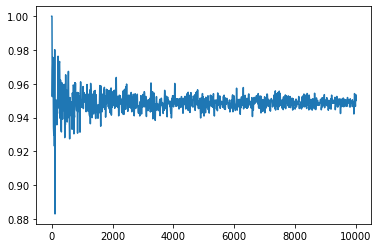

In [16]:
sns.lineplot(x=simulation_attempt_list, y=ci_values_vary_simulation_attempt)